In [1]:
import numpy as np
import matplotlib.pyplot
import random as rm
from scipy.optimize import brentq as root
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
gamma = 1.4 
Gamma = ( gamma - 1 )/( gamma  + 1 )
beta = 0.5*( gamma -1 ) / gamma 

disc_init = 0.5 
discv_fin = 0.9

rho1 = 1.0
rho5 = 0.1

P1 = 1.0
P5 = 0.1

n_grid = 1001

rho = np.zeros(n_grid)
presion = np.zeros(n_grid)
vel = np.zeros(n_grid)

pos = np.linspace(0,1,n_grid)

#inicializar condiciones
for i in range (n_grid):
    if (pos[i] <= disc_init):
        rho[i] = rho1
        presion[i] = P1
    else:
        rho[i] = rho5
        presion[i] = P5
        

    

In [3]:
def vel_sound(P,rho,gamma = 1.4):
    return np.sqrt(gamma*P/rho)

a1 = vel_sound(P1,rho1)

def U2(x,t):
    return 2*(a1+(x-disc_init)/t)/(gamma+1)
def a2(x,t):
    return a1-(gamma-1)*U2(x,t)/2
def P2(x,t):
    return P1*(a2(x,t)/a1)**(1/beta)
def rho2(x,t):
    return gamma*P2(x,t)/(a2(x,t)**2)


In [4]:
def mach0(mach):
    parent = ((P5/P1)*((2*gamma) * (mach**2) /(gamma+1) - Gamma))**beta 
    a1 = vel_sound(P1,rho1)
    return (1/mach) - mach + a1*(1-parent)/Gamma

mach = root(mach0,0.38,8)

In [5]:
#resolver

P4 = P5 * ((2*gamma) * mach**2 /(gamma+1) - Gamma)
P3 = P4
rho4 = rho5/(2 / (mach**2 *(gamma+1)) + Gamma)
rho3 = rho1*(P3/P1)**(1/gamma)
U4 = 2*(mach - 1/mach)/(gamma+1)
U3 = 2*(a1-vel_sound(P3,rho3))/(gamma-1)

    




time = (0.4)/mach

x1 = disc_init - a1*time
x2 = disc_init + (U3-vel_sound(P3,rho3))*time
x3 =  disc_init + U3*time
x4 = 0.9



for i in range(len(pos)):
    if (pos[i] < x1):
        rho[i] = rho1
        presion[i] = P1
        vel[i] = 0.0
    elif(pos[i] < x2):
        rho[i] = rho2(pos[i],time)
        presion[i] = P2(pos[i],time)
        vel[i] = U2(pos[i],time)
    elif(pos[i] < x3):
        rho[i] = rho3
        presion[i] = P3
        vel[i] = U3
    elif(pos[i] < x4):
        rho[i] = rho4
        presion[i] = P4
        vel[i] = U4
    else:
        rho[i] = rho5
        presion[i] = P5
        vel[i] = 0.0
        



([<matplotlib.axis.YTick at 0x7f1c83bf2780>,
 <a list of 2 Text yticklabel objects>)

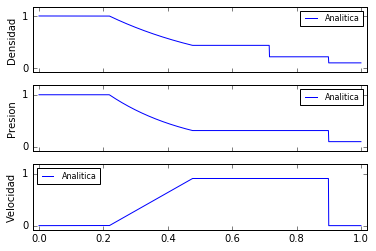

In [6]:
f, axarr = plt.subplots(3, sharex=True, sharey=True)
axarr = axarr.reshape(3)
graf = [rho,presion,vel]
axarr[0].plot(pos, graf[0], label="Analitica")
axarr[0].legend(loc=0,prop={'size':8})
axarr[0].set_ylabel('Densidad')

axarr[1].plot(pos, graf[1],label="Analitica")
axarr[1].legend(loc=0,prop={'size':8})
axarr[1].set_ylabel('Presion')

axarr[2].plot(pos, graf[2],label="Analitica")
axarr[2].legend(loc=0,prop={'size':8})
axarr[2].set_ylabel('Velocidad')
plt.xlim(min(pos)-0.02,max(pos)+0.02)
plt.ylim(min(graf[0])-0.18,max(graf[0])+0.18)
plt.yticks(arange(2),(0,1))


